In [1]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneOut
from matplotlib import pyplot as plt

In [2]:
def compute_lo(X, y, alpha):
    model = Ridge(alpha=alpha)
    result = 0
    for train_indexes, test_indexes in LeaveOneOut().split(X):
        X_train = X[train_indexes]
        X_test = X[test_indexes]
        y_train = y[train_indexes]
        y_test = y[test_indexes]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result += (y_test[0] - y_pred[0])**2
    return result / len(y)

In [3]:
def plot_lo(X, y):
    alphas = np.arange(0.0001, 100, 0.1)
    alphas = np.logspace(-2, 3)
    los = [compute_lo(X, y, alpha) for alpha in alphas]
    plt.plot(alphas, los)
    plt.xscale('log')

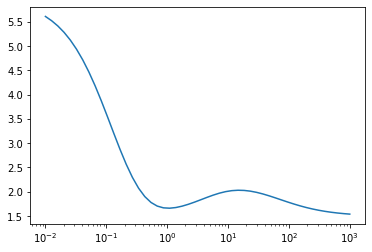

In [4]:
X = np.array([[ 3, -4, -4], [ 2,  4,  4], [-2,  1,  2], [-3, -5, -2], [ 0,  4, -1]])
y = np.array([-1,  1, -1, -1, -2])
plot_lo(X, y)

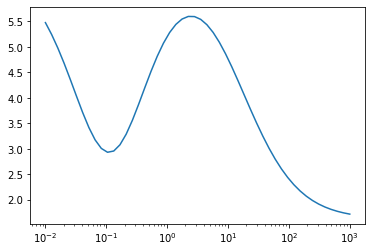

In [5]:
X =  np.array([[-5, -2, -3], [-5,  2,  0], [ 4, -5, -3], [ 2, -3,  4], [-3, -2, -2]])
y =  np.array([-3, -2, -1, -4, -3])
plot_lo(X, y)

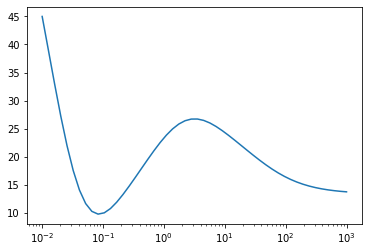

In [6]:
X = np.array([[ 4, -3,  0], [-3, -2,  0], [ 2, -3,  2], [-4,  1,  0], [-5, -5, -2]])
y = np.array([-4,  4,  4,  1,  1])
plot_lo(X, y)